# Tugas 1 Concolutional Neural Network Milestone A
- 13520116 Mahesa Lizardy
- 13520146 Bryan Amirul Husna

In [18]:
# preprocess images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 25
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)


def create_data_sparse():
    # data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=0.2,
    #                               height_shift_range=0.2, zoom_range=0.2)
    data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

    train_images = data_gen.flow_from_directory('Dataset/PandasBears/Train', 
                                                target_size=(img_height, img_width),
                                                class_mode='binary', 
                                                batch_size=500, 
                                                subset='training', 
                                                # color_mode='rgb'
                                                )
    
    
    test_images = data_gen.flow_from_directory('Dataset/PandasBears/Test', 
                                               target_size=(img_height, img_width),
                                               class_mode='binary', 
                                               batch_size=200, 
                                               shuffle=False, 
                                            #    color_mode='rgb'
                                               )

    return train_images, test_images

train_images, test_images = create_data_sparse()

labels = ['bear', 'panda']

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [19]:
print(len(train_images[0][0]))

400


In [20]:
X_train = train_images[0][0]
y_train = train_images[0][1]

X_test = test_images[0][0]
y_test = test_images[0][1]

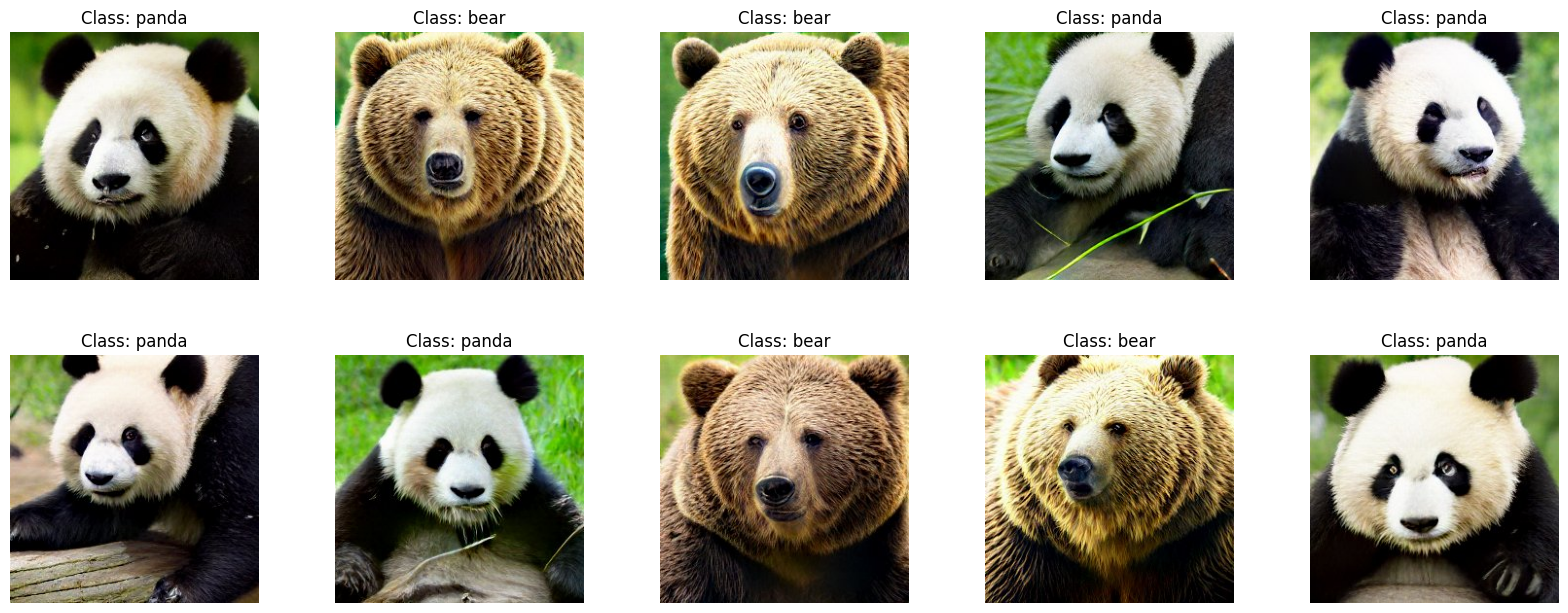

In [21]:
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(X_train[i])
    plt.title(f"Class: {labels[int(y_train[i])]}")
    plt.axis('off')


In [24]:
# import from src
from src import Pooling, Convolution, Flatten, Dense, Model

In [73]:
samples = next(train_images)
input_shape = samples[0][0].shape
conv = Convolution(input_size=input_shape, padding_size=1, filter_size=(3, 3), num_filters=2, stride=1, bias=0)
pool = Pooling(filter_size = (32,32), stride=32, mode='max')
flat = Flatten()
dense_layer_relu = Dense(num_units=7, activation_function="sigmoid")
dense_layer_sigmoid = Dense(num_units=1, activation_function="relu")
model = Model()
model.add(conv )
model.add(pool)
model.add(flat)
model.add(dense_layer_relu)
model.add(dense_layer_sigmoid)


In [74]:
model.train_network(train_data=X_train, label_data=y_train, batch_size=1, lr=0.01, epochs=1)

Epoch 1/1 - Accuracy: 80.00%


0

In [12]:
model.saveModel()

In [75]:
model.showModel()

Layer (type)         Output Shape             Param #
Convolution          (256, 256)         20
________________________________________________________
Pooling              (8, 8, 2)               
________________________________________________________
Flatten              (128,)              0 
________________________________________________________
Dense                (7)            14
________________________________________________________
Dense                (1)            2
________________________________________________________


In [86]:
import numpy as np
input = np.array([[[4],
                    [1],
                    [3],
                    [5],
                    [3]],

                    [[2],
                    [1],
                    [1],
                    [2],
                    [2]],

                    [[5],
                    [5],
                    [1],
                    [2],
                    [3]],

                    [[2],
                    [2],
                    [4],
                    [3],
                    [2]],

                    [[5],
                    [1],
                    [3],
                    [4],
                    [5]]])
input_shape = input.shape
conv2d =  Convolution(input_size=input_shape, padding_size=0, filter_size=(3, 3), num_filters=2, stride=1, bias=0)
# a = np.random.randn(3,3,1)
filter = np.array([
                [[[ 1],
                    [2],
                    [3]],

                    [[4],
                    [7],
                    [5]],

                    [[3],
                    [-32],
                    [25]]],

                [[[ 12],
                    [18],
                    [12]],

                    [[18],
                    [-74],
                    [45]],

                [[-92],
                    [45],
                    [-18]]]
                    ])

conv2d.setFilter(filter)
# print(conv2d.filter)


In [88]:
output_conv = conv2d.forward(input)
print(output_conv)

[[[  0.   0.]
  [ 76.   0.]
  [ 64.  66.]]

 [[109.   0.]
  [  0. 102.]
  [ 10.   0.]]

 [[118.   0.]
  [ 71.   0.]
  [ 67.   0.]]]


In [91]:
pool = Pooling(filter_size = (3,3), stride=1, mode='max')
output_pool=pool.forward(output_conv)
print(output_pool)

[[[118. 102.]]]


In [180]:
flat = Flatten()
flat_output = flat.forward(output_pool)
print(flat_output)

[118. 102.]


In [181]:
dense = Dense(num_units=2, activation_function="relu")
weight_dense = np.array([[1,2],[3,-4]])
bias = np.array([0,0])
dense.setWeights(weight_dense)
dense.setBias(bias)
dense_output = dense.forward(flat_output)
print(dense_output)

[424.   0.]


In [211]:
dense_layer_sigmoid = Dense(num_units=10, activation_function="sigmoid")
weight_dense_s = np.array([[0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.04,0.05,0.01]
                            ,[0.02,0.03,0.03,0.02,0.01,0.02,0.07,0.08,0.05,0.01]]
                           )
bias_s = np.array([0,0,0,0,0,0,0,0,0,0])
dense_layer_sigmoid.setWeights(weight_dense_s)
dense_layer_sigmoid.setBias(bias_s)
dense_output_s = dense_layer_sigmoid.forward(dense_output)

print(dense_output_s)

[1.         1.         1.         1.         1.         0.99999996
 0.99999701 0.99999996 1.         0.98579704]
